In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#we read the file
df = pd.read_csv(r"C:\Users\USER\Downloads\Leads.csv")
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [8]:
#dropping columns which are not necessary for analysis
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [9]:
#we see the missing values
(df.isnull().sum()/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
#now we remove all the columns that have 30% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [11]:
(df2.isnull().sum()/df2.shape[0])*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [12]:
#as there are still null values and we cant drop off the columns so we replacing them with "not given"
columns_to_fill = [
    'Specialization',
    'What matters most to you in choosing a course',
    'Country',
    'What is your current occupation'
]

for column in columns_to_fill:
    df2[column] = df2[column].fillna('not given')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [13]:
(df2.isnull().sum()/df2.shape[0])*100

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [14]:
#calculates and rounds null percentages in non-null rows
df3 = df2[df2.isnull().sum(axis=1) <1]
null_percentage = df3.isnull().mean() * 100
null_percentage_rounded = null_percentage.round(2)
null_percentage_rounded

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [15]:
#we drop ID
#AS they are different for every person
df_final = df3.drop('Prospect ID', axis=1)
df_final.shape

(9074, 21)

In [16]:
#Now, we do Univariate analysis

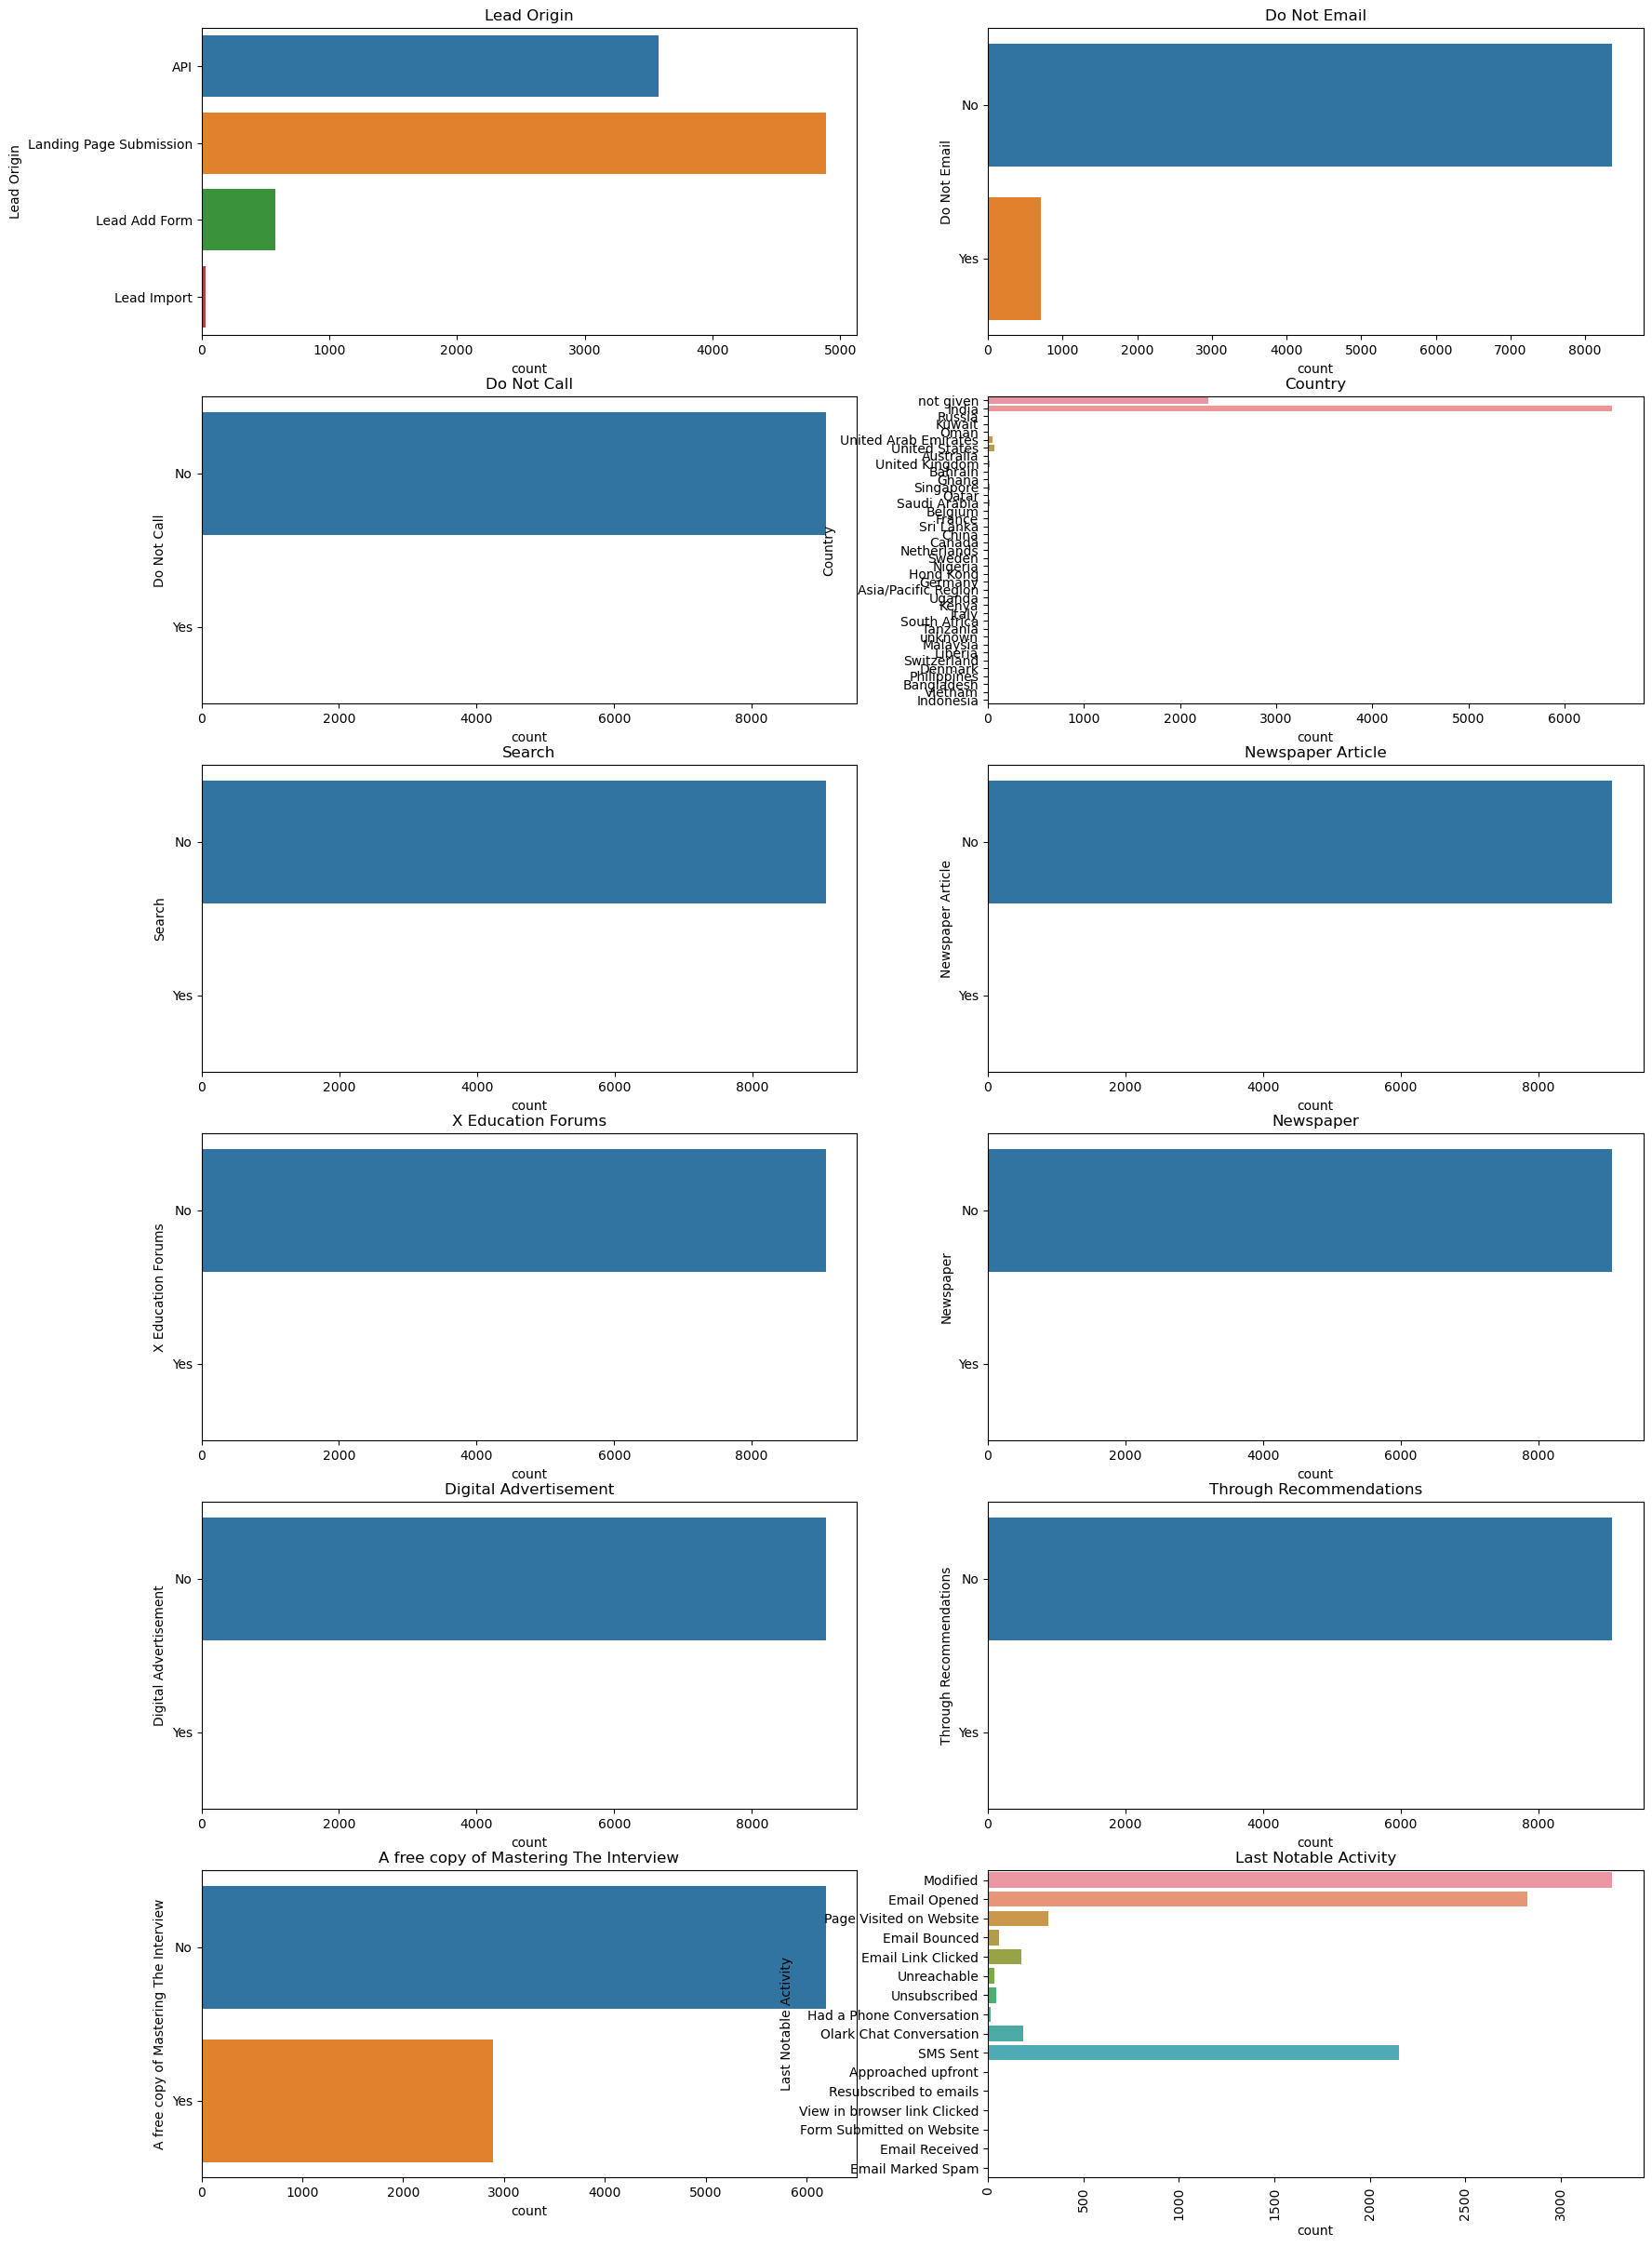

In [17]:
plt.figure(figsize=(20, 30))
plot_titles = [
    'Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search',
    'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
    'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity'
]

for i, column in enumerate(plot_titles, 1):
    plt.subplot(6, 2, i)
    sns.countplot(y=df_final[column])
    plt.title(column)
    if column == 'Last Notable Activity':
        plt.xticks(rotation=90)
plt.show()

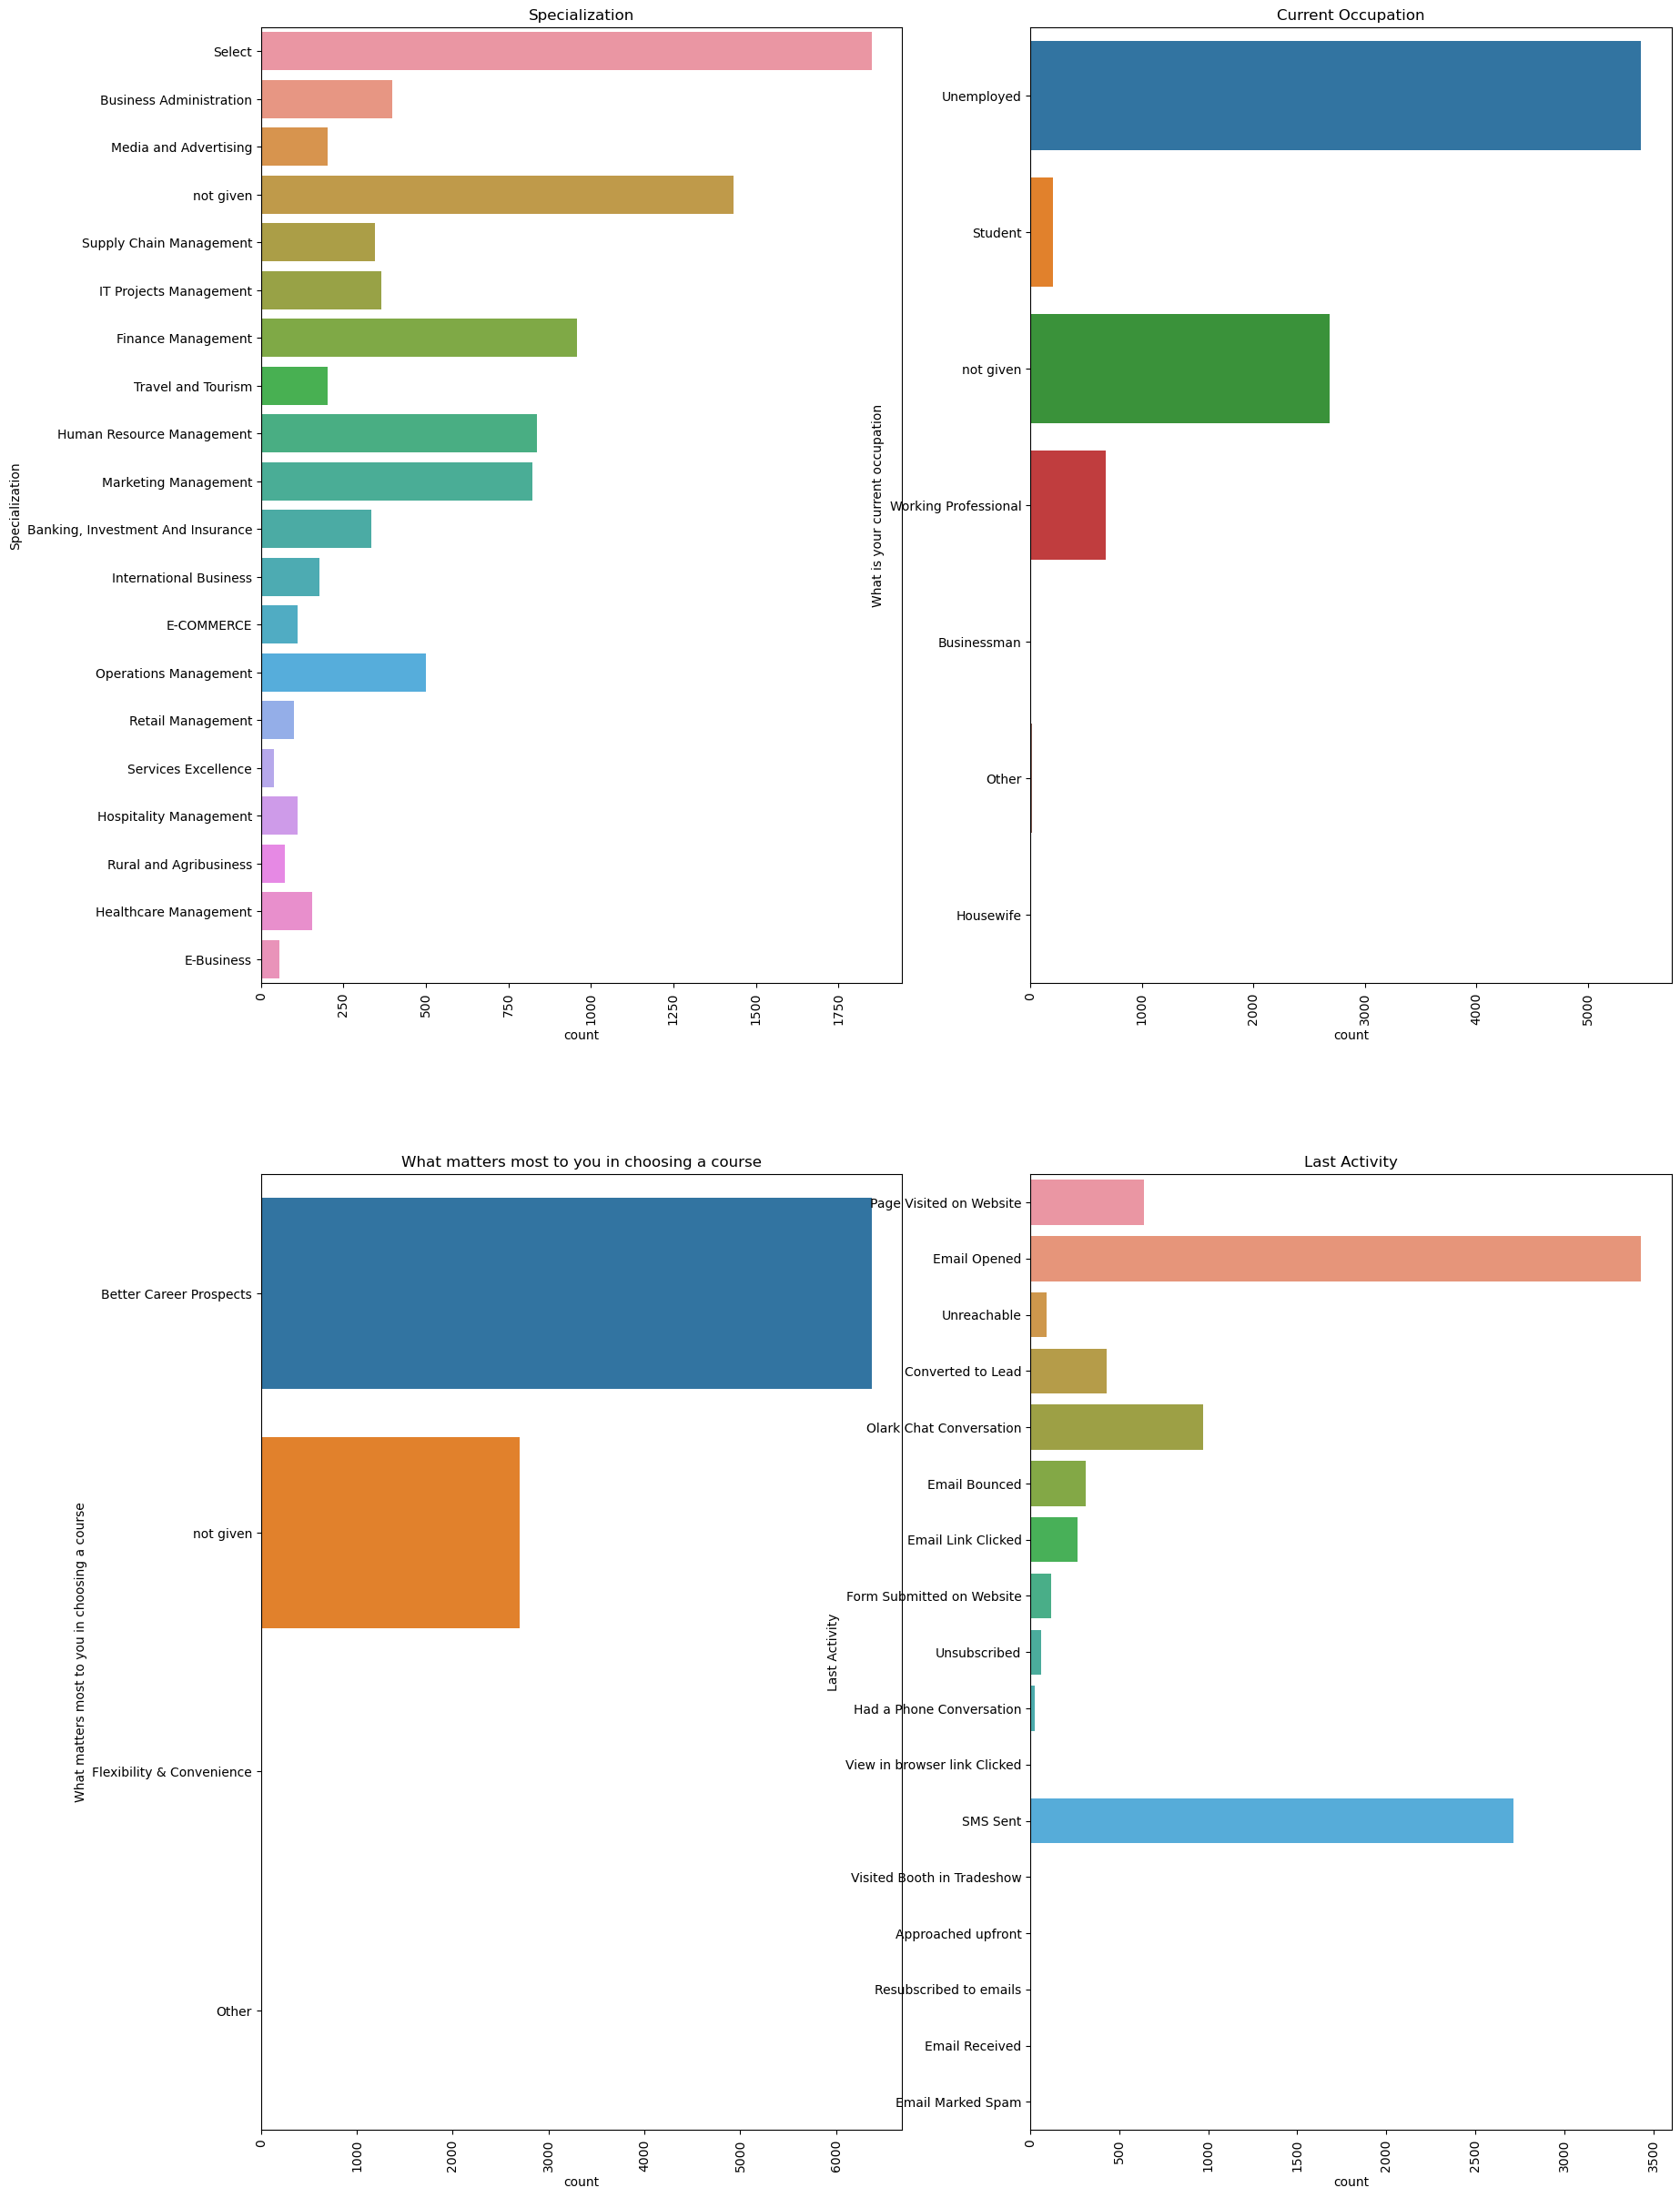

In [18]:
# we clean and convert the columns to strings
columns_to_clean = [
    'Specialization',
    'What is your current occupation',
    'What matters most to you in choosing a course',
    'Last Activity'
]

for column in columns_to_clean:
    df_final[column] = df_final[column].astype(str).str.strip()

# Plot the data
plt.figure(figsize=(20, 30))
plt.subplot(2, 2, 1)
sns.countplot(y=df_final['Specialization']).tick_params(axis='x', rotation=90)
plt.title('Specialization')
plt.subplot(2, 2, 2)
sns.countplot(y=df_final['What is your current occupation']).tick_params(axis='x', rotation=90)
plt.title('Current Occupation')
plt.subplot(2, 2, 3)
sns.countplot(y=df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation=90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2, 2, 4)
sns.countplot(y=df_final['Last Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Activity')
plt.show()

In [19]:
#Now for doing the same for NUmerical datas

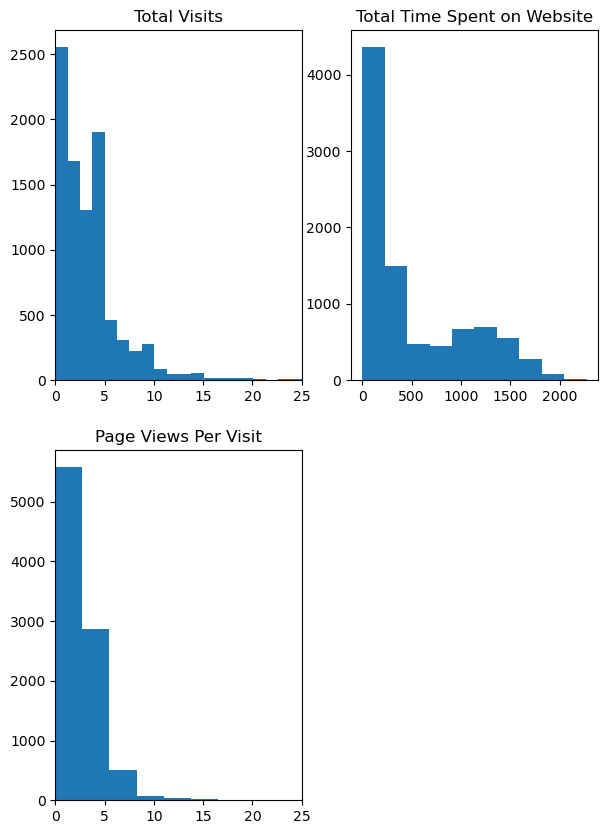

In [20]:
plt.figure(figsize = (7,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,25)
plt.show()

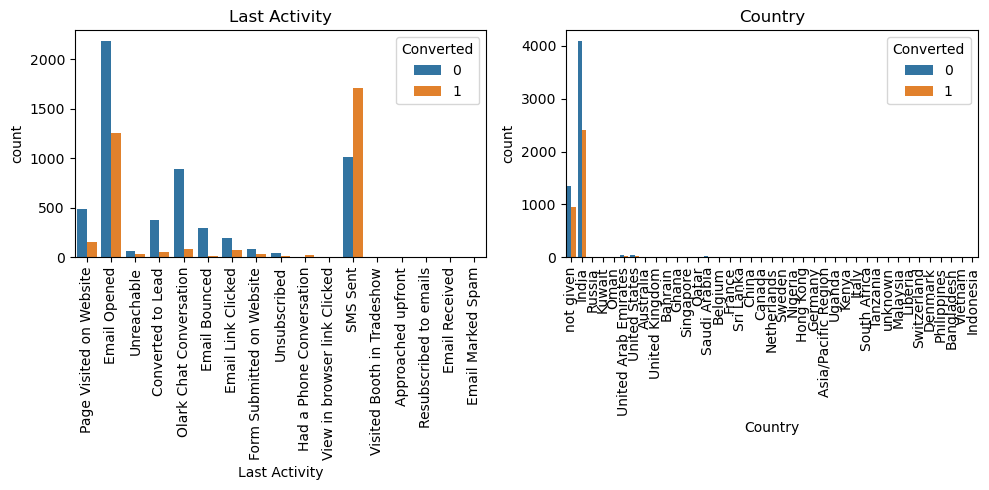

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Last Activity
sns.countplot(ax=axes[0], x='Last Activity', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Last Activity')

# Plot for Country
sns.countplot(ax=axes[1], x='Country', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Country')

plt.tight_layout()
plt.show()

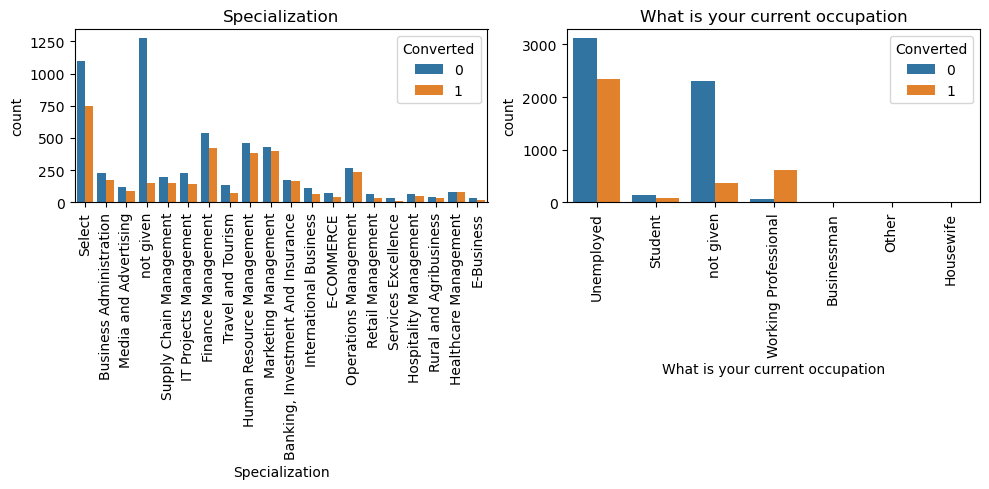

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Specialization
sns.countplot(ax=axes[0], x='Specialization', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Specialization')

# Plot for Current Occupation
sns.countplot(ax=axes[1], x='What is your current occupation', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('What is your current occupation')

plt.tight_layout()
plt.show()

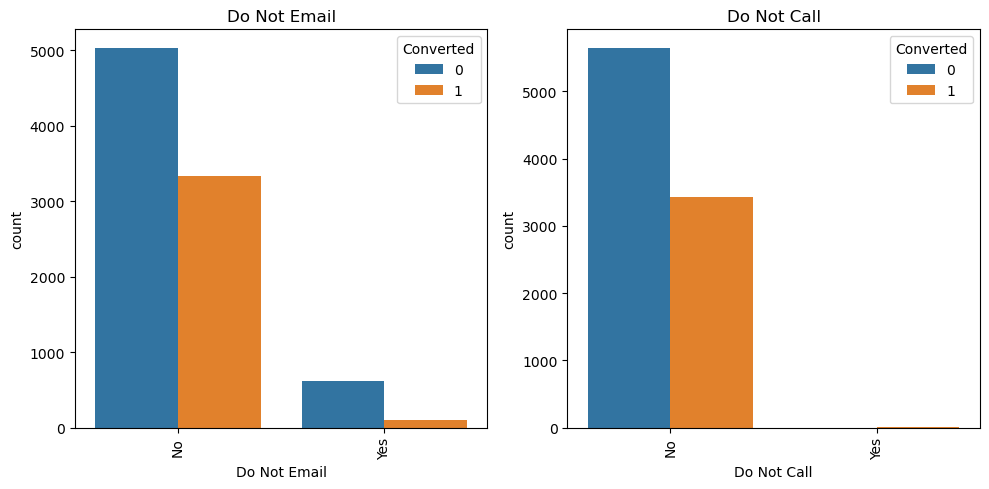

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Do Not Email
sns.countplot(ax=axes[0], x='Do Not Email', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Do Not Email')

# Plot for Do Not Call
sns.countplot(ax=axes[1], x='Do Not Call', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Do Not Call')

plt.tight_layout()
plt.show()

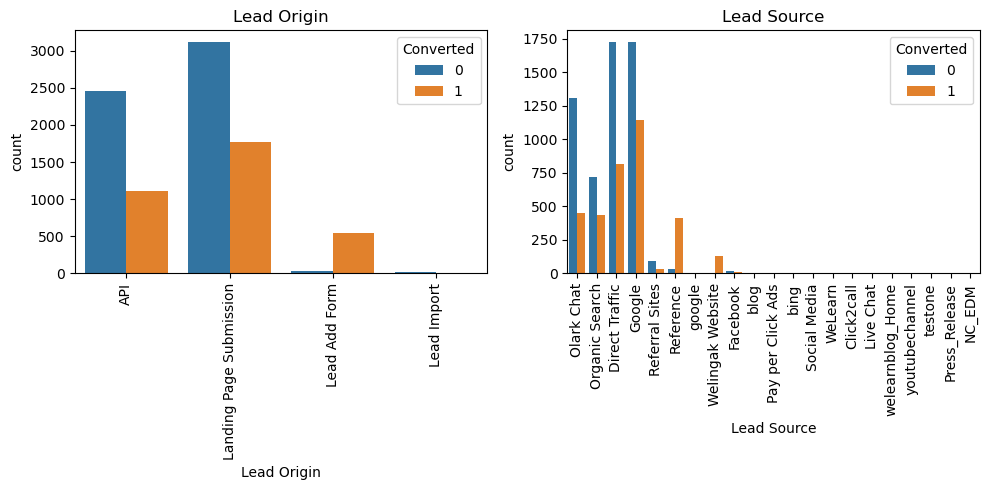

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Lead Origin
sns.countplot(ax=axes[0], x='Lead Origin', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Lead Origin')

# Plot for Lead Source
sns.countplot(ax=axes[1], x='Lead Source', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Lead Source')

plt.tight_layout()
plt.show()

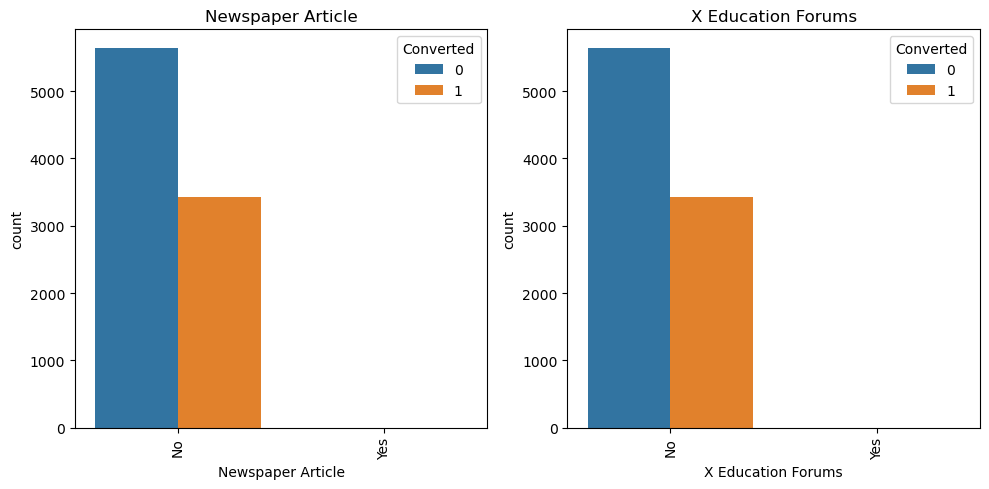

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Newspaper Article
sns.countplot(ax=axes[0], x='Newspaper Article', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Newspaper Article')

# Plot for X Education Forums
sns.countplot(ax=axes[1], x='X Education Forums', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('X Education Forums')

plt.tight_layout()
plt.show()

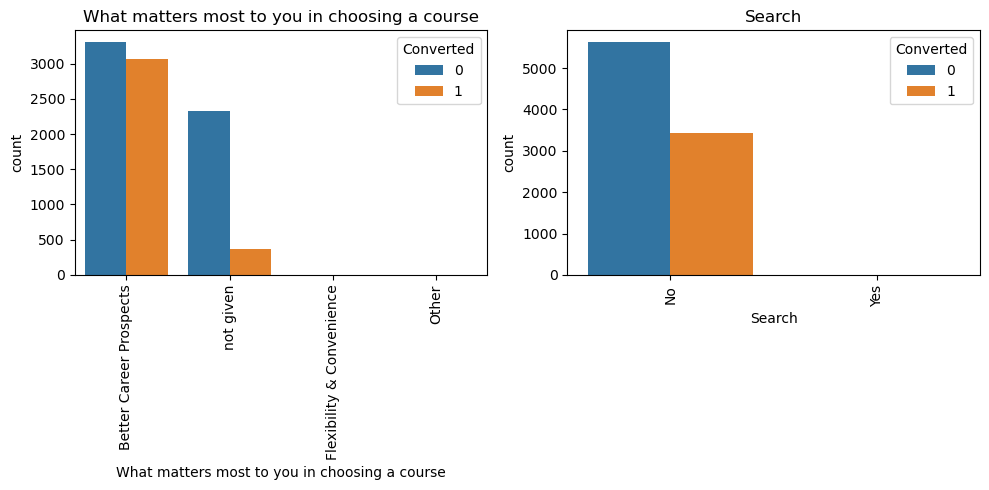

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for "What matters most to you in choosing a course"
sns.countplot(ax=axes[0], x='What matters most to you in choosing a course', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('What matters most to you in choosing a course')

# Plot for Search
sns.countplot(ax=axes[1], x='Search', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Search')

plt.tight_layout()
plt.show()

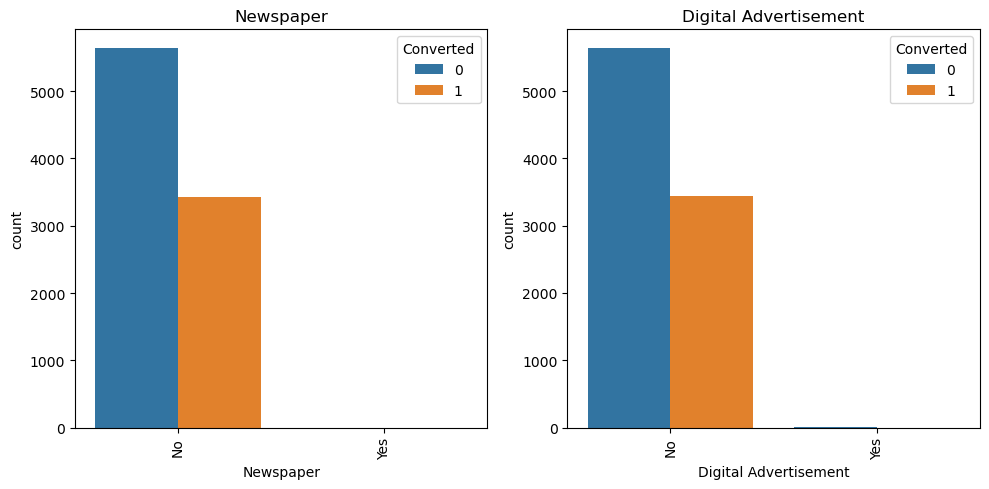

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Newspaper
sns.countplot(ax=axes[0], x='Newspaper', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Newspaper')

# Plot for Digital Advertisement
sns.countplot(ax=axes[1], x='Digital Advertisement', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('Digital Advertisement')

plt.tight_layout()
plt.show()

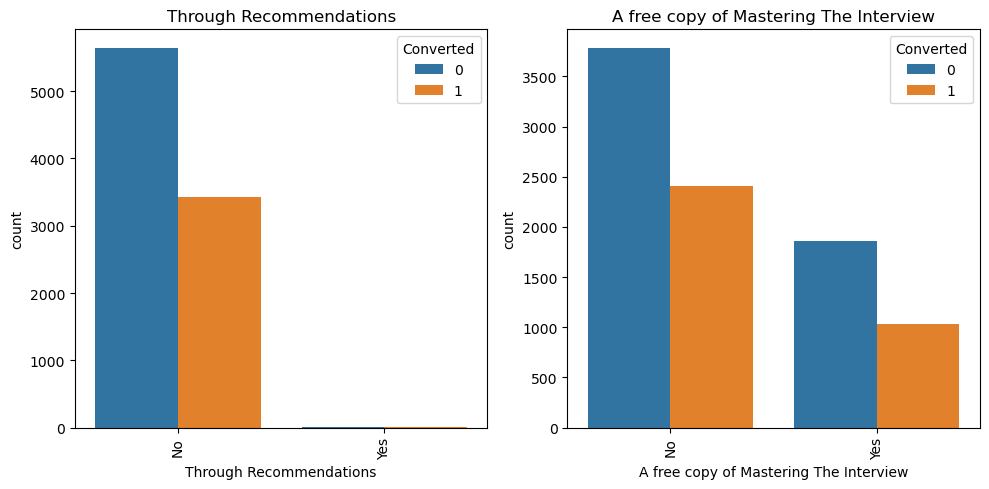

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for Through Recommendations
sns.countplot(ax=axes[0], x='Through Recommendations', hue='Converted', data=df_final)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Through Recommendations')

# Plot for A free copy of Mastering The Interview
sns.countplot(ax=axes[1], x='A free copy of Mastering The Interview', hue='Converted', data=df_final)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('A free copy of Mastering The Interview')

plt.tight_layout()
plt.show()

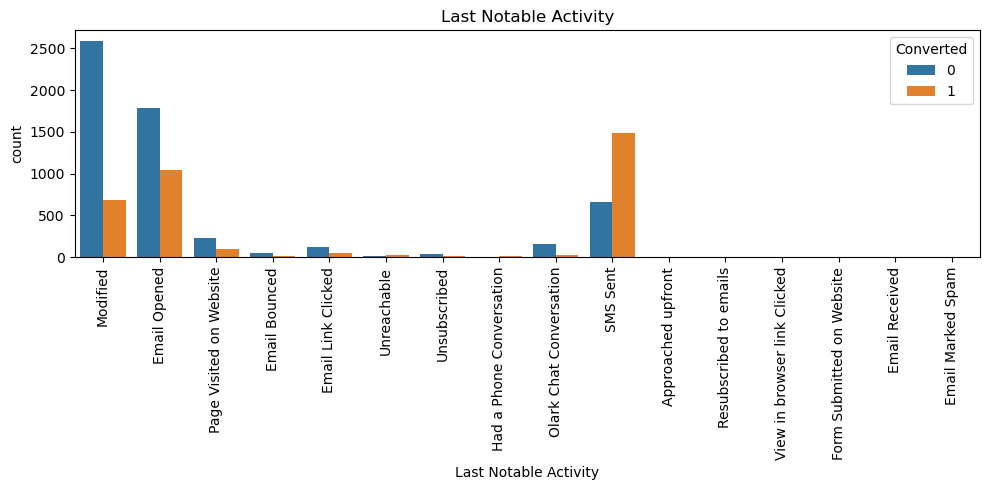

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(ax=ax, x='Last Notable Activity', hue='Converted', data=df_final)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Last Notable Activity')

plt.tight_layout()
plt.show()

In [30]:
#Now we create dummy variables:-

In [31]:
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [32]:
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not given,...,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,False,False,True,False,False,False,False,False,False,False
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,False,False,True,False,False,False,False,False,False,False


In [33]:
columns_to_drop = [
    'Lead Origin', 'Lead Source',
    'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization',
    'What is your current occupation',
    'What matters most to you in choosing a course', 'Search', 'Newspaper Article',
    'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
    'A free copy of Mastering The Interview', 'Last Notable Activity'
]

df_final_dum = df_final_dum.drop(columns=columns_to_drop, axis=1, errors='ignore')
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.00,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9236,0,2.0,238,2.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9237,0,2.0,199,2.00,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
9238,1,3.0,499,3.00,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [34]:
#We make the model now

In [35]:
X = df_final_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [36]:
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [37]:
#data spilt into 70% and 30% for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [38]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3604,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5584,0.042553,0.751761,0.250000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7679,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7563,0.014184,0.787852,0.083333,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [39]:
#Now we build the model

In [40]:
logreg = LogisticRegression()

In [41]:
#take output for 15 variables
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [42]:
# all columns in this vairable
col = X_train.columns[rfe.support_]

In [43]:
X_train = X_train[col]

In [44]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes(include=['bool']).columns})
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.4
Date:                Mon, 29 Jul 2024   Deviance:                       5254.8
Time:                        09:26:34   Pearson chi2:                 6.47e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3978
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0581      0.106    -19.428      0.000      -2.266      -1.850
TotalVisits                                              6.0485      1.492      4.055      0.000       3.125       8.972
Total Time Spent on Website                              4.6258      0.167     27.671      0.000       4.298       4.954
Lead Origin_Landing Page Submission                     -0.3558      0.090     -3.968      0.000      -0.532      -0.180
Lead Origin_Lead Add Form                                3.4941      0.233     14.964      0.000       3.036       3.952
Lead Source_Olark Chat                                   1.3633      0.125     10.867      0.000       1.117       1.609
Lead Source_Welingak Website                             2.5968      1.033      2.514      0.012       0.572       4.621
Do Not Email_Yes                                        -1.4093      0.171     -8.220      0.000      -1.745      -1.073
Last Activity_Had a Phone Conversation                   0.4998      0.849      0.589      0.556      -1.165       2.164
Last Activity_Olark Chat Conversation                   -1.4409      0.168     -8.566      0.000      -1.771      -1.111
Last Activity_SMS Sent                                   1.2875      0.074     17.370      0.000       1.142       1.433
What is your current occupation_Housewife               24.2817   3.05e+04      0.001      0.999   -5.97e+04    5.97e+04
What is your current occupation_Working Professional     2.5373      0.194     13.107      0.000       2.158       2.917
What is your current occupation_not given               -1.2097      0.086    -13.998      0.000      -1.379      -1.040
Last Notable Activity_Had a Phone Conversation          23.5521   2.14e+04      0.001      0.999   -4.19e+04    4.19e+04
Last Notable Activity_Unreachable                        1.8019      0.602      2.992      0.003       0.621       2.982
========================================================================================================================
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
7,Last Activity_Had a Phone Conversation,1.89
13,Last Notable Activity_Had a Phone Conversation,1.89
4,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
12,What is your current occupation_not given,1.45
8,Last Activity_Olark Chat Conversation,1.40


In [46]:
#The VIF values look good but the p-values are not satisfactory therefore I'm removing 'What is your current occupation_Housewife'
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [47]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.3
Date:                Mon, 29 Jul 2024   Deviance:                       5264.7
Time:                        09:26:34   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3968
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0505      0.106    -19.392      0.000      -2.258      -1.843
TotalVisits                                              5.9826      1.485      4.028      0.000       3.072       8.893
Total Time Spent on Website                              4.6218      0.167     27.673      0.000       4.294       4.949
Lead Origin_Landing Page Submission                     -0.3521      0.090     -3.932      0.000      -0.528      -0.177
Lead Origin_Lead Add Form                                3.4962      0.233     14.987      0.000       3.039       3.953
Lead Source_Olark Chat                                   1.3593      0.125     10.845      0.000       1.114       1.605
Lead Source_Welingak Website                             2.5898      1.033      2.507      0.012       0.565       4.614
Do Not Email_Yes                                        -1.4124      0.171     -8.242      0.000      -1.748      -1.077
Last Activity_Had a Phone Conversation                   0.4949      0.849      0.583      0.560      -1.169       2.159
Last Activity_Olark Chat Conversation                   -1.4437      0.168     -8.584      0.000      -1.773      -1.114
Last Activity_SMS Sent                                   1.2819      0.074     17.308      0.000       1.137       1.427
What is your current occupation_Working Professional     2.5319      0.194     13.083      0.000       2.153       2.911
What is your current occupation_not given               -1.2128      0.086    -14.042      0.000      -1.382      -1.043
Last Notable Activity_Had a Phone Conversation          22.5497    1.3e+04      0.002      0.999   -2.54e+04    2.55e+04
Last Notable Activity_Unreachable                        1.7968      0.602      2.984      0.003       0.617       2.977
========================================================================================================================
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
7,Last Activity_Had a Phone Conversation,1.89
12,Last Notable Activity_Had a Phone Conversation,1.89
4,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
11,What is your current occupation_not given,1.45
8,Last Activity_Olark Chat Conversation,1.39


In [49]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [50]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2636.1
Date:                Mon, 29 Jul 2024   Deviance:                       5272.1
Time:                        09:26:34   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0521      0.106    -19.406      0.000      -2.259      -1.845
TotalVisits                                              6.0334      1.486      4.060      0.000       3.121       8.946
Total Time Spent on Website                              4.6120      0.167     27.644      0.000       4.285       4.939
Lead Origin_Landing Page Submission                     -0.3468      0.090     -3.874      0.000      -0.522      -0.171
Lead Origin_Lead Add Form                                3.4943      0.233     14.975      0.000       3.037       3.952
Lead Source_Olark Chat                                   1.3617      0.125     10.863      0.000       1.116       1.607
Lead Source_Welingak Website                             2.5941      1.033      2.511      0.012       0.570       4.619
Do Not Email_Yes                                        -1.4161      0.171     -8.270      0.000      -1.752      -1.080
Last Activity_Had a Phone Conversation                   1.9152      0.684      2.799      0.005       0.574       3.257
Last Activity_Olark Chat Conversation                   -1.4424      0.168     -8.578      0.000      -1.772      -1.113
Last Activity_SMS Sent                                   1.2816      0.074     17.311      0.000       1.137       1.427
What is your current occupation_Working Professional     2.5297      0.194     13.073      0.000       2.150       2.909
What is your current occupation_not given               -1.2146      0.086    -14.062      0.000      -1.384      -1.045
Last Notable Activity_Unreachable                        1.7964      0.602      2.984      0.003       0.616       2.976
========================================================================================================================
"""

In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
0,TotalVisits,2.03
1,Total Time Spent on Website,2.00
4,Lead Source_Olark Chat,1.55
9,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.47
11,What is your current occupation_not given,1.45
8,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Welingak Website,1.31
10,What is your current occupation_Working Profes...,1.19


In [52]:
#All VIF are good and the p-values are all below 0.05 thus we can finalize the model

In [53]:
##Now Predicition

In [54]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.625335
3604    0.129536
5584    0.213186
7679    0.129536
7563    0.476038
7978    0.822380
7780    0.158674
7863    0.982644
838     0.815283
708     0.183713
dtype: float64

In [55]:
# DataFrame with actual conversion rate and predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
1289,1,0.625335
3604,0,0.129536
5584,0,0.213186
7679,0,0.129536
7563,0,0.476038


In [56]:
# Assigning 1 if Conversion_Prob > 0.5, else 0
y_train_pred_final['Predicted'] = (y_train_pred_final.Conversion_Prob > 0.5).astype(int)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
1289,1,0.625335,1
3604,0,0.129536,0
5584,0,0.213186,0
7679,0,0.129536,0
7563,0,0.476038,0


In [57]:
#we can do model evaluation now

In [58]:
#create a confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 737, 1719]], dtype=int64)

In [59]:
# Assigning the values of the confusion matrix
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives
FP = confusion[0, 1]  # False Positives
FN = confusion[1, 0]  # False Negatives

In [60]:
#we get sensitivity from this formulae
TP/(TP+FN)

0.6999185667752443

In [61]:
#we get specificity from this formulae
TN/(TN+FP)

0.8826700898587934

In [62]:
#Make a ROC function
def draw_roc(actual, probs):
    fpr, tpr, _ = metrics.roc_curve(actual, probs)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [63]:
#setting fpr,tpr and thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

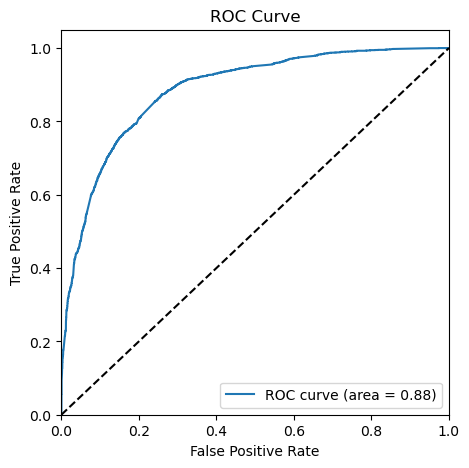

In [64]:
#Visuialize on the graph
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [65]:
#0.88 is a good value for ROC

In [66]:
for i in range(10):
    y_train_pred_final[i / 10] = (y_train_pred_final.Conversion_Prob > i / 10).astype(int)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1289,1,0.625335,1,1,1,1,1,1,1,1,0,0,0
3604,0,0.129536,0,1,1,0,0,0,0,0,0,0,0
5584,0,0.213186,0,1,1,1,0,0,0,0,0,0,0
7679,0,0.129536,0,1,1,0,0,0,0,0,0,0,0
7563,0,0.476038,0,1,1,1,1,1,0,0,0,0,0


In [67]:
cutoff_df = pd.DataFrame(columns=['probablity', 'accuracy', 'sensitivity', 'specificity'])
num = [x / 10 for x in range(10)]
for i in num:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = cm.sum()
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    speci = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    sensi = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
cutoff_df

,probablity,accuracy,sensitivity,specificity
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.582900,0.982899,0.330680
0.2,0.2,0.760983,0.916531,0.662901
0.3,0.3,0.790899,0.874186,0.738383
0.4,0.4,0.811841,0.768730,0.839024
0.5,0.5,0.811998,0.699919,0.882670
0.6,0.6,0.802236,0.628664,0.911682
0.7,0.7,0.774839,0.506107,0.944288
0.8,0.8,0.753267,0.414495,0.966881
0.9,0.9,0.707605,0.263436,0.987677


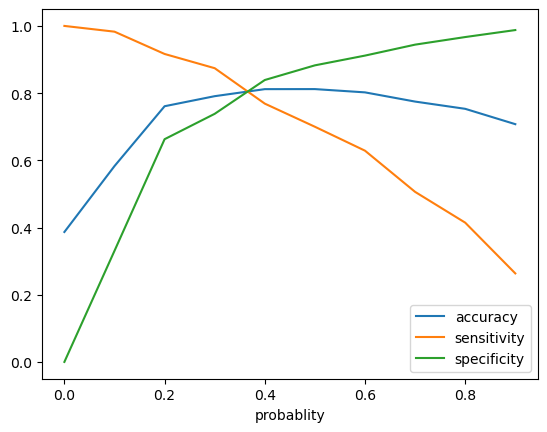

In [68]:
#now we plot all these values on a graph
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

In [69]:
#so cut is between 0.3 adn 0.4, we'll consider it 00.35
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1289,1,0.625335,1,1,1,1,1,1,1,1,0,0,0,1
3604,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
5584,0,0.213186,0,1,1,1,0,0,0,0,0,0,0,0
7679,0,0.129536,0,1,1,0,0,0,0,0,0,0,0,0
7563,0,0.476038,0,1,1,1,1,1,0,0,0,0,0,1


In [70]:
#now we check accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017635018107385

In [71]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3142,  753],
       [ 506, 1950]], dtype=int64)

In [72]:
# Assigning the values of the confusion matrix
TP = confusion2[1, 1]  # True Positives
TN = confusion2[0, 0]  # True Negatives
FP = confusion2[0, 1]  # False Positives
FN = confusion2[1, 0]  # False Negatives

In [73]:
#we get sensitivity from this formulae
TP/(TP+FN)

0.7939739413680782

In [74]:
#we get specificity from this formulae
TN/(TN+FP)

0.8066752246469833

In [75]:
#we have acuuracy, sensitivity and specificity at 80%

In [76]:
#Prediction making
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [77]:
#substitutte this in the final model
col = X_train.columns

In [78]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What is your current occupation_not given,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,True,False,False,False,False,False,False,False,False,False,False
7212,1.0,0.028369,0.001320,True,False,False,False,False,False,False,True,True,False,False
2085,1.0,0.000000,0.000000,False,True,False,True,False,False,False,False,False,False,False
4048,1.0,0.028369,0.617077,True,False,False,False,False,False,False,True,False,False,False
4790,1.0,0.028369,0.005282,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,False,True,False,False,False,True,False,False,False,False
8179,1.0,0.170213,0.148768,True,False,False,False,False,False,False,True,False,True,False
6236,1.0,0.000000,0.000000,False,False,True,False,False,False,False,False,False,True,False
5240,1.0,0.078014,0.458627,True,False,False,False,False,False,False,True,False,False,False


In [85]:
y_test_pred = res.predict(X_test_sm)
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

#Remove index 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [86]:
#Add y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.434703
1,1.0,0.830560
2,1.0,0.982644
3,1.0,0.869866
4,0.0,0.099441


In [87]:
# Predicting with a 0.35 cutoff for this
y_pred_final['final_predicted'] = (y_pred_final.Conversion_Prob > 0.35).astype(int)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0.0,0.434703,1
1,1.0,0.830560,1
2,1.0,0.982644,1
3,1.0,0.869866,1
4,0.0,0.099441,0
...,...,...,...
2718,1.0,0.105946,0
2719,0.0,0.350039,1
2720,0.0,0.129536,0
2721,1.0,0.812834,1


In [88]:
#Now we precision and recall
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 737, 1719]], dtype=int64)

In [89]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7899816176470589

In [90]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6999185667752443

In [91]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8017635018107385

In [92]:
#Now we do predicition on the test set

In [93]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.434703
1,1.0,0.830560
2,1.0,0.982644
3,1.0,0.869866
4,0.0,0.099441


In [94]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0.0,0.434703,1
1,1.0,0.830560,1
2,1.0,0.982644,1
3,1.0,0.869866,1
4,0.0,0.099441,0
...,...,...,...
2718,1.0,0.105946,0
2719,0.0,0.350039,1
2720,0.0,0.129536,0
2721,1.0,0.812834,1


In [95]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1408,  336],
       [ 184,  795]], dtype=int64)

In [96]:
# Assigning the values of the confusion matrix
TP = confusion2[1, 1]  # True Positives
TN = confusion2[0, 0]  # True Negatives
FP = confusion2[0, 1]  # False Positives
FN = confusion2[1, 0]  # False Negatives|

In [97]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7029177718832891

In [98]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8120531154239019

In [99]:
#cut off is 0.35 we have Precision around 61% and Recall around 72%